In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from data.clean import get_rawdata
from model.models import SimpleLSTM
import torch
import torch.nn.functional as F
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

/home/morteza/anaconda3/envs/digger/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = SimpleLSTM(2, 16, 2)
checkpoint = torch.load("../lightning_logs/version_2/checkpoints/epoch=989-step=990.ckpt")
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [4]:
WINDOW_LEN = 64

In [5]:
train, test, scaler = get_rawdata(WINDOW_LEN, "../data/cellar/croston.csv", split=0.5, return_scaler=True)
train_loader = DataLoader(test, shuffle=False, batch_size=1)

In [45]:
l = []
ll = []
lll = []
for x, y in train_loader:
    y_hat = model(x)
    d = scaler.inverse_transform(torch.cat((x[0], y[0]), dim=1))
    dd = scaler.inverse_transform(torch.cat((x[0], y_hat[0].detach()), dim=1).numpy())
    l.append([np.round(d[0][2]), d[0][3]])
    ll.append([np.round(dd[0][2]), dd[0][3]])
    ddd = scaler.inverse_transform(torch.cat((x[0], x[0].detach()), dim=1).numpy())
    lll.append([np.round(ddd[0][2]), ddd[0][3]])
l = np.array(l)
l[:, 0] = np.cumsum(l[:, 0])
ll = np.array(ll)
ll[:, 0] = np.cumsum(ll[:, 0])
lll = np.array(lll)
lll[:, 0] = np.cumsum(lll[:, 0])

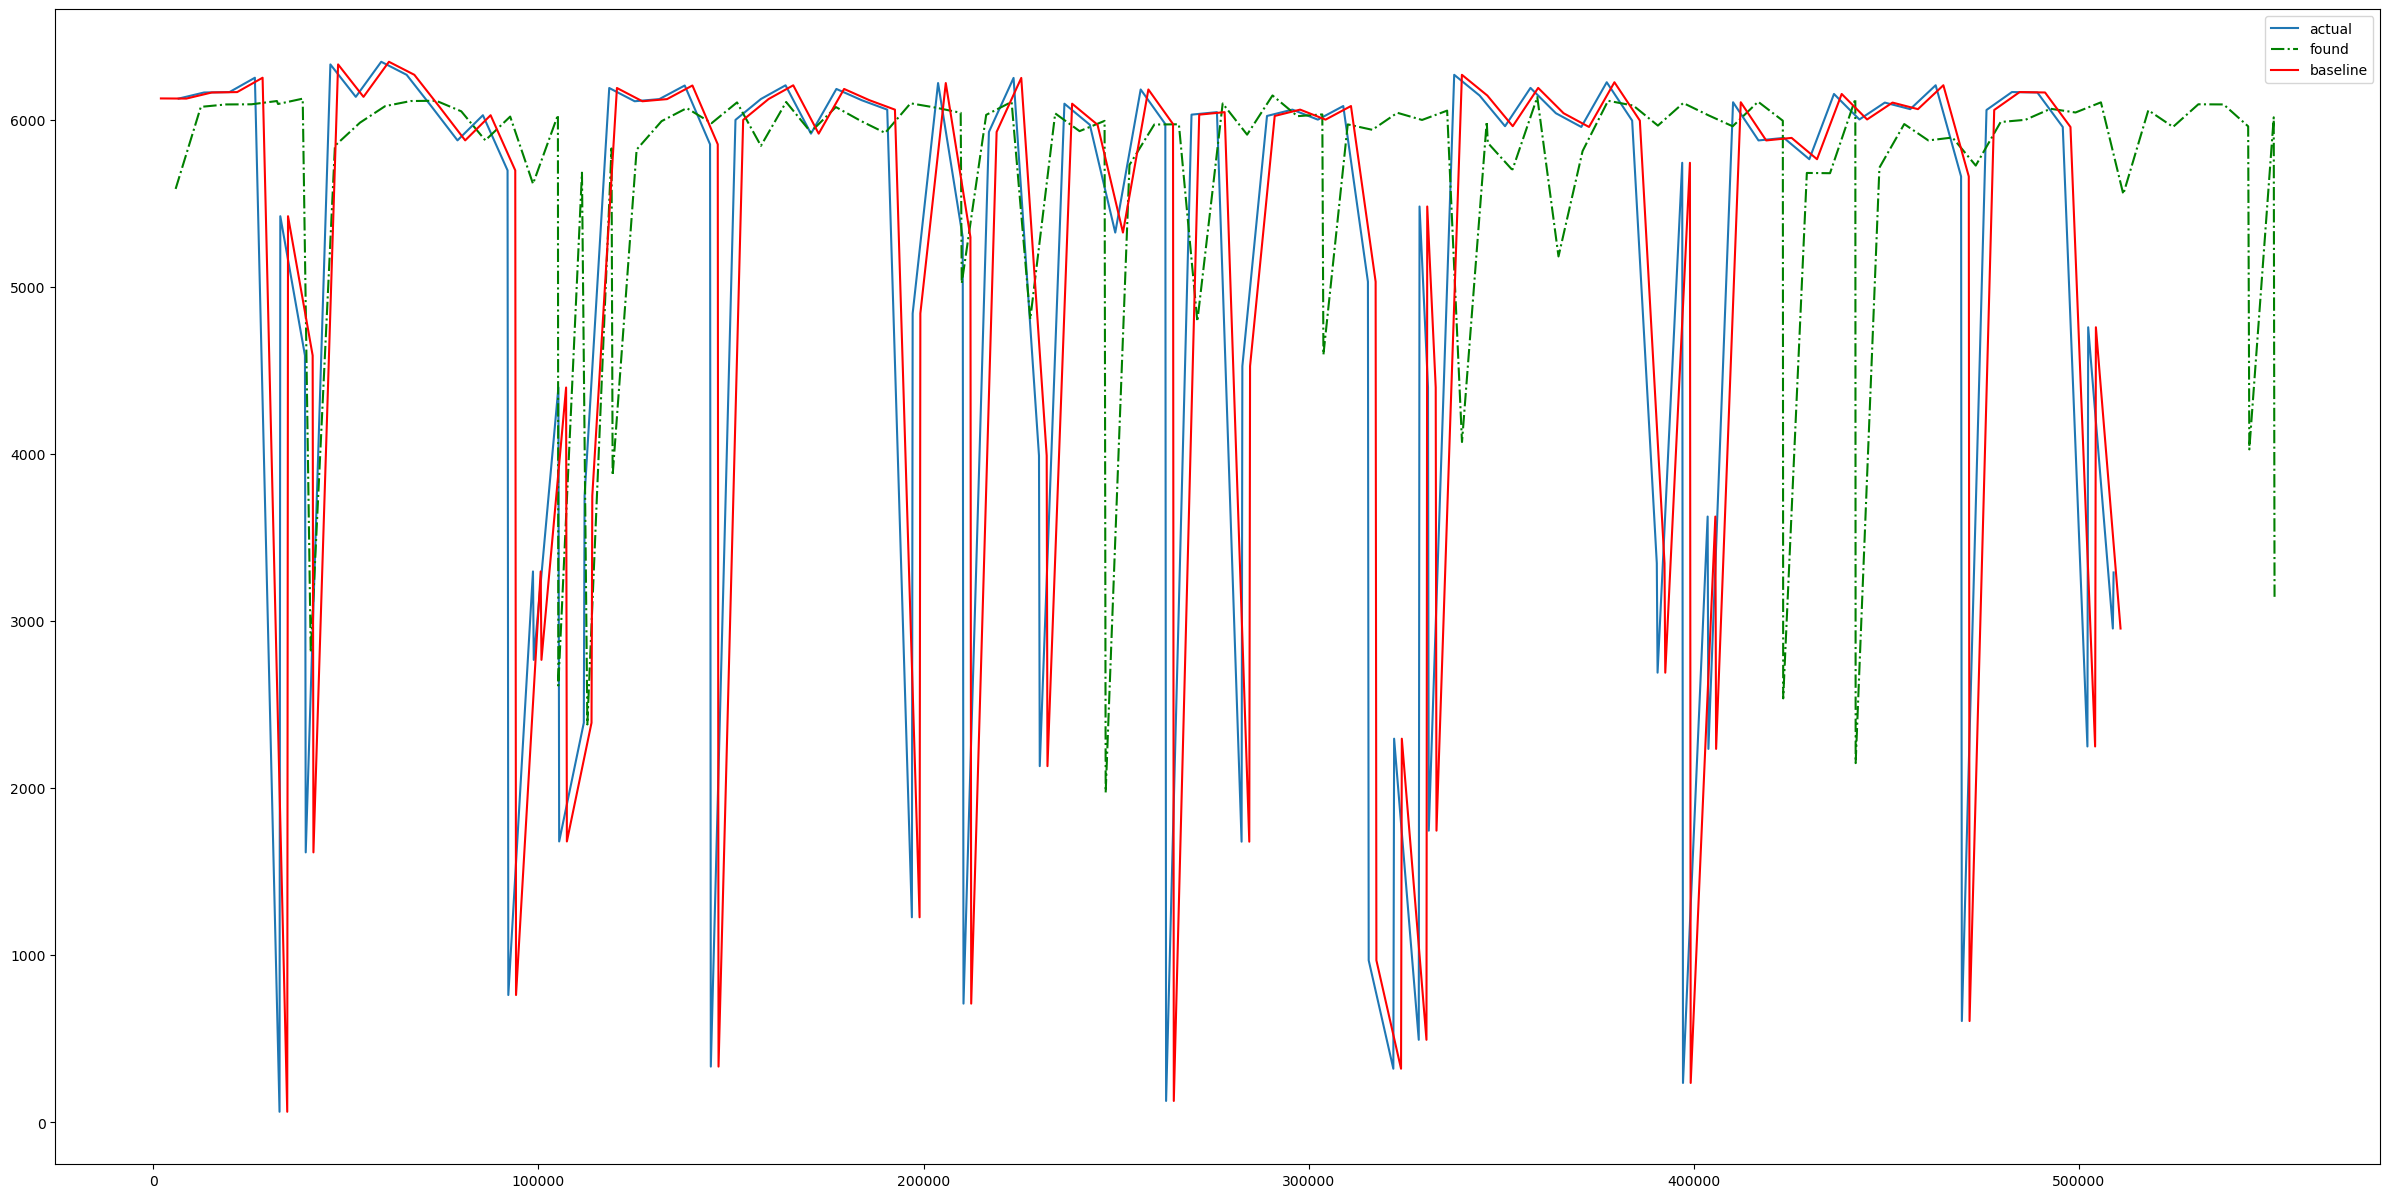

In [46]:
plt.figure(figsize=(30,15))
plt.plot(l[:, 0][:100], l[:, 1][:100], label = "actual")
plt.plot(ll[:, 0][:100], ll[:, 1][:100], 'g-.', label = "found")
plt.plot(lll[:, 0][:100], lll[:, 1][:100], 'r-', label = "baseline")
plt.legend()
plt.show()

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("../data/cellar/ts_1000.csv")
x, y = df['timestamp'].values, df['size'].values

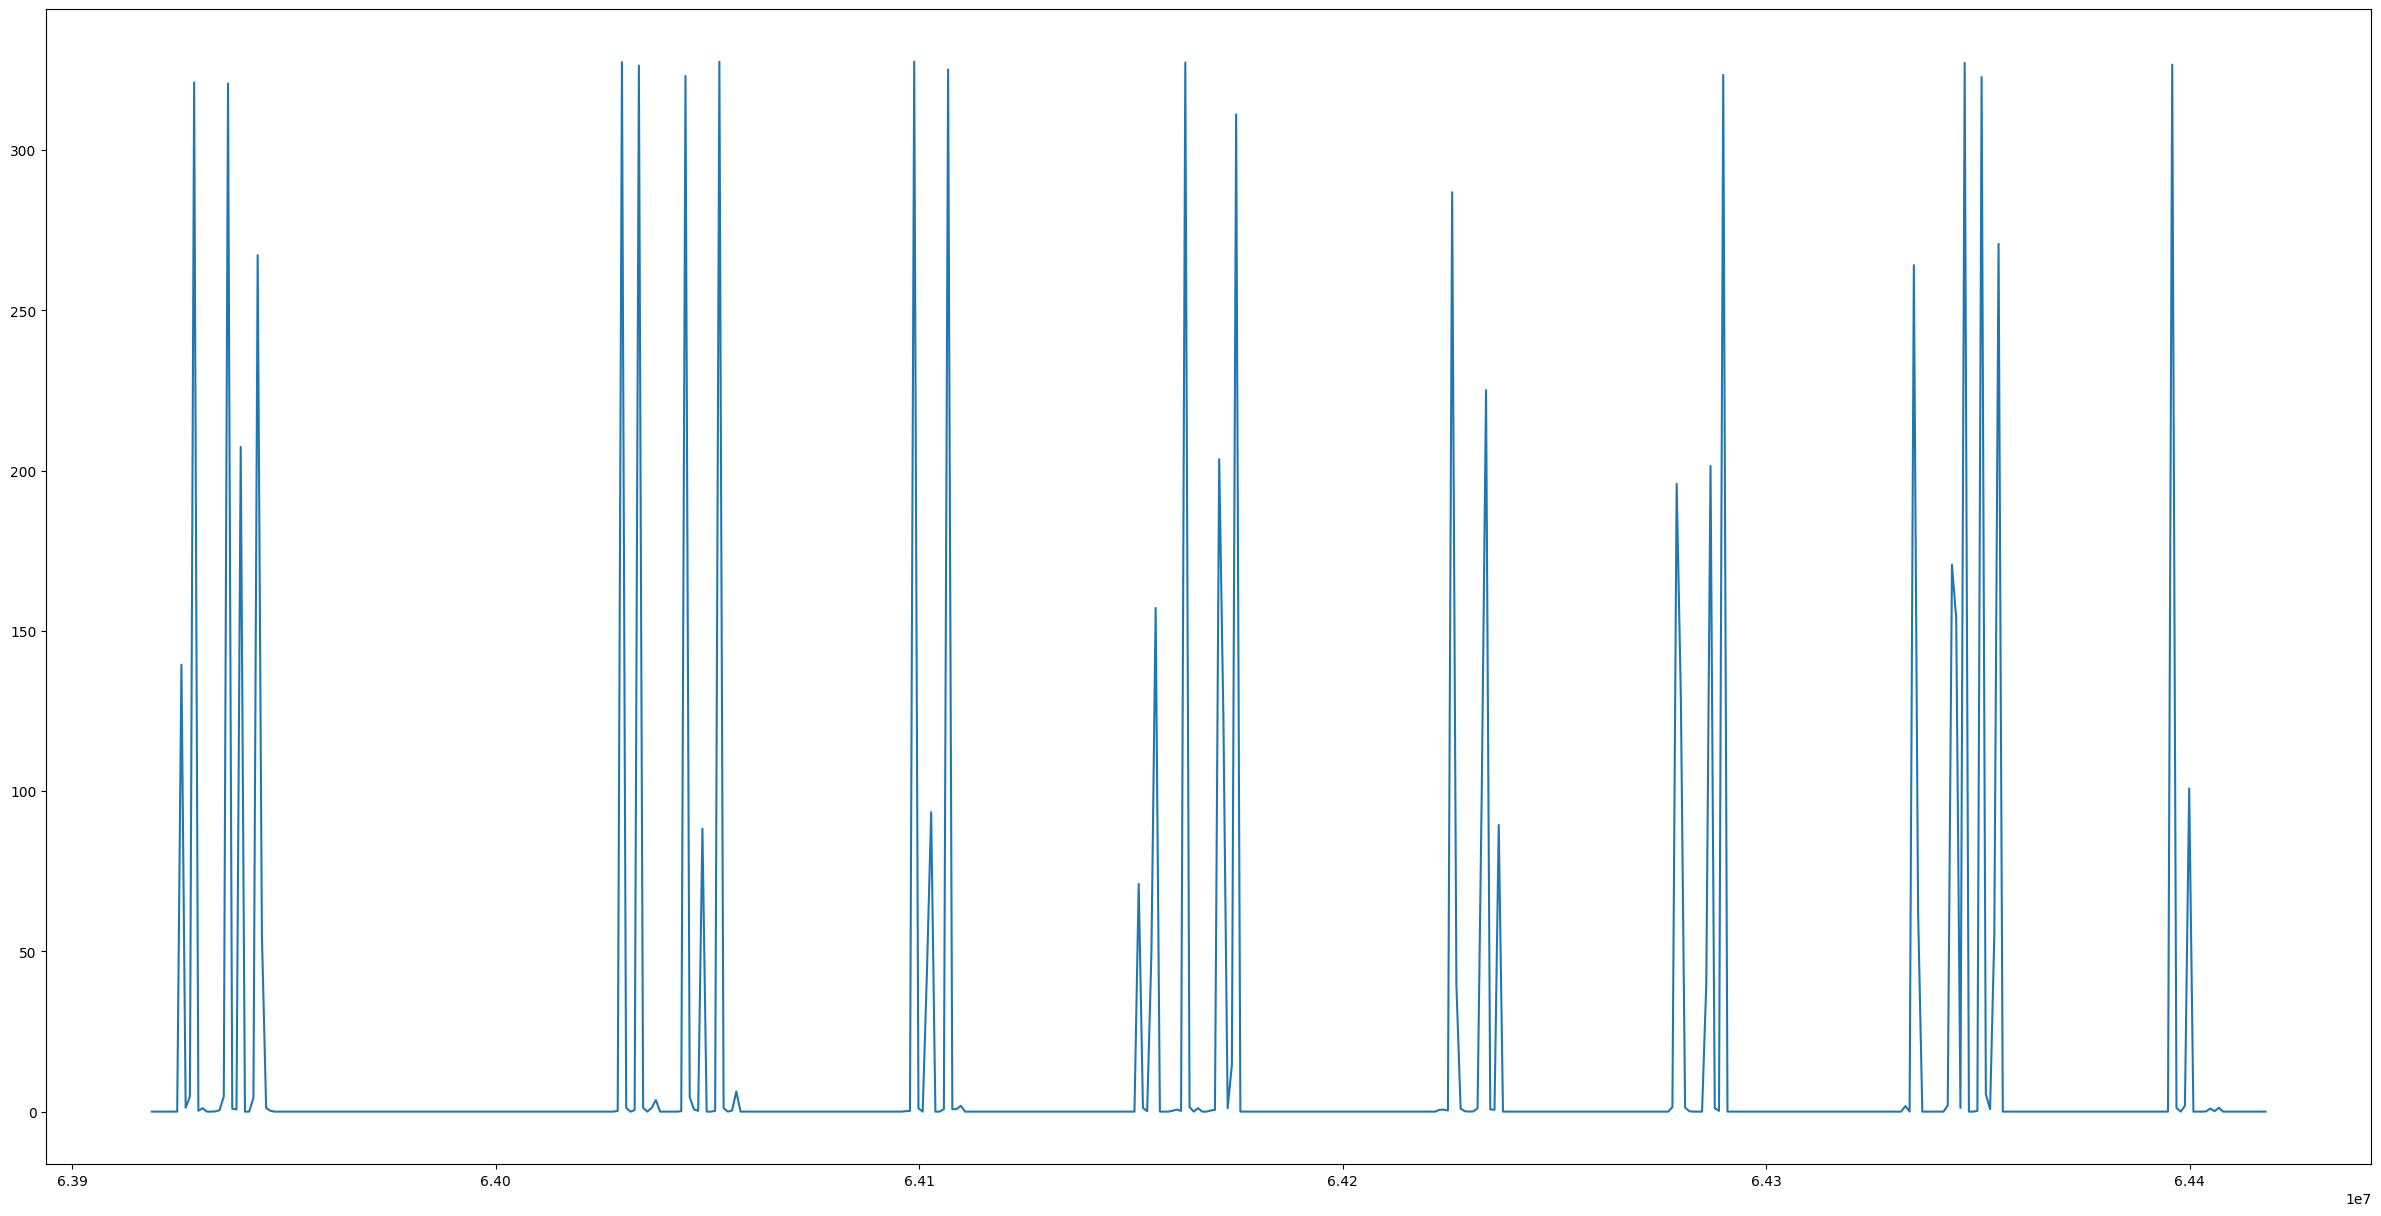

In [20]:
plt.figure(figsize=(30,15))
plt.plot(x[10000:10500], y[10000:10500])